# EDA

Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to

1. maximize insight into a data set;
2. uncover underlying structure;
3. extract important variables;
4. detect outliers and anomalies;
5. test underlying assumptions;
6. develop parsimonious models; and
7. determine optimal factor settings.

- [ref](https://www.kaggle.com/hamzashabbirbhatti/eda-a-quant-s-prespective)

- EDA + missing values + TSNE clustering+ class imb

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [7]:
#!pip install seaborn --upgrade
#!pip install plotly #interactive 시각화 툴
#!pip install dabl
#!pip install missingno

In [4]:
# plotting stuff
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
colorMap = sns.light_palette("blue", as_cmap=True)

from IPython.display import Image

In [2]:
import dabl
import datatable as dt

  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572793 sha256=954094e9764a1b37b747d3a8f4480229999370b65b18b72ccf416bd90346824c
  Stored in directory: c:\users\lg\appdata\local\pip\cache\wheels\aa\38\8f\66d5e159658b37cb0b8f9176a9f584f14bcd5ea0c1e96011bf
Successfully built dabl


You should consider upgrading via the 'd:\installation\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
# garbage collector to keep RAM in check
import gc 

[missingno](https://hong-yp-ml-records.tistory.com/14)

In [8]:
# misc 결측치 확인
import missingno as msno

## train.csv

- open

In [11]:
%%time

train_df = pd.read_csv('./train.csv')

Wall time: 2min 19s


In [16]:
# %%time

# import datatable as dt
# train_data_datatable = dt.fread('./train.csv')
# train_data = train_data_datatable.to_pandas()

Wall time: 3min 44s


In [17]:
train_df.head(3) # 2390491 rows × 138 columns

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2


In [13]:
# train_df.describe()

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


In [18]:
# print(list(train_df.columns))

In [9]:
# print(train_df.date.unique()) #500일
# print(train_df.ts_id.unique()) #2390491 timestep

- 138 columns
- date + weight + resp + resp(1-4) + feature(0-129) + ts_id = 1+1+5+130+1 = 138

### resp(I think it is the most important)

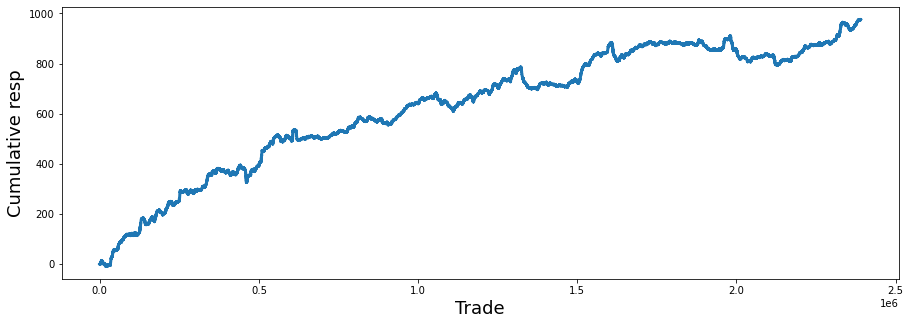

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
balance= pd.Series(train_data['resp']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_ylabel ("Cumulative resp", fontsize=18);
balance.plot(lw=3);
del balance
gc.collect();

> "*The longer the Time Horizon, the more aggressive, or riskier portfolio, an investor can build. The shorter the Time Horizon, the more conservative, or less risky, the investor may want to adopt.*"

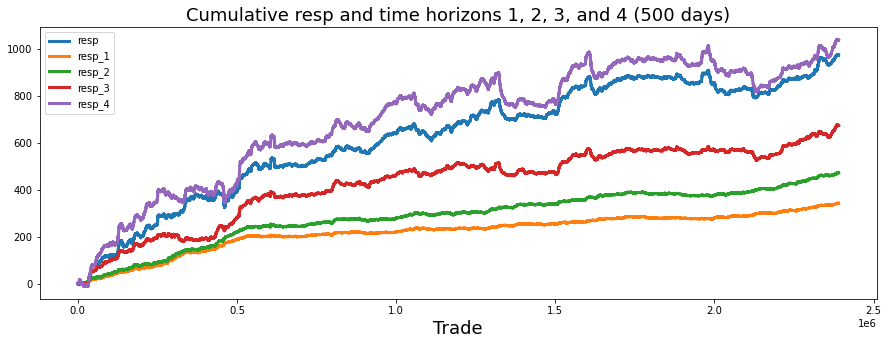

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
balance= pd.Series(train_data['resp']).cumsum()
resp_1= pd.Series(train_data['resp_1']).cumsum()
resp_2= pd.Series(train_data['resp_2']).cumsum()
resp_3= pd.Series(train_data['resp_3']).cumsum()
resp_4= pd.Series(train_data['resp_4']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_title ("Cumulative resp and time horizons 1, 2, 3, and 4 (500 days)", fontsize=18)
balance.plot(lw=3)
resp_1.plot(lw=3)
resp_2.plot(lw=3)
resp_3.plot(lw=3)
resp_4.plot(lw=3)
plt.legend(loc="upper left");
del resp_1
del resp_2
del resp_3
del resp_4
gc.collect();

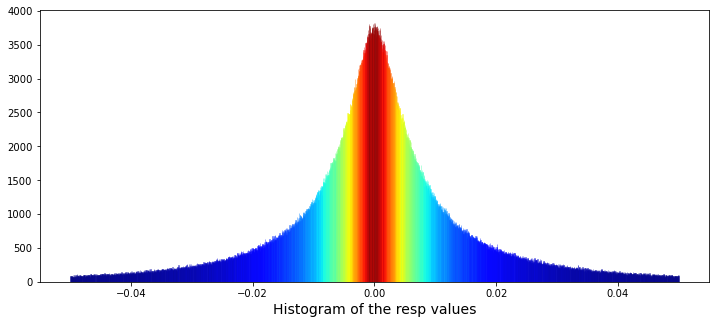

In [21]:
plt.figure(figsize = (12,5))
ax = sns.distplot(train_data['resp'], 
             bins=3000, 
             kde_kws={"clip":(-0.05,0.05)}, 
             hist_kws={"range":(-0.05,0.05)},
             color='darkcyan', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the resp values", size=14)
plt.show();
gc.collect();

In [22]:
min_resp = train_data['resp'].min()
print('The minimum value for resp is: %.5f' % min_resp)
max_resp = train_data['resp'].max()
print('The maximum value for resp is:  %.5f' % max_resp)

print("Skew of resp is:      %.2f" %train_data['resp'].skew() )
print("Kurtosis of resp is: %.2f"  %train_data['resp'].kurtosis() )

The minimum value for resp is: -0.54938
The maximum value for resp is:  0.44846
Skew of resp is:      0.10
Kurtosis of resp is: 17.36


### weight

> *Each trade has an associated `weight` and `resp`, which together represents a return on the trade.
Trades with `weight = 0` were intentionally included in the dataset for completeness, although such trades will not contribute towards the scoring evaluation.*

In [23]:
percent_zeros = (100/train_data.shape[0])*((train_data.weight.values == 0).sum())
print('Percentage of zero weights is: %i' % percent_zeros +"%")
min_weight = train_data['weight'].min()
print('The minimum weight is: %.2f' % min_weight)
max_weight = train_data['weight'].max()
print('The maximum weight was: %.2f' % max_weight)

Percentage of zero weights is: 17%
The minimum weight is: 0.00
The maximum weight was: 167.29


In [24]:
train_data[train_data['weight']==train_data['weight'].max()]

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
2097681,446,167.293715,0.000281,0.001213,0.00138,-0.000427,-0.001215,-1,-0.735754,-0.048433,...,0.948026,-1.094062,0.326287,-0.715126,1.490866,-1.111595,1.083793,-0.979801,0.913979,2097681


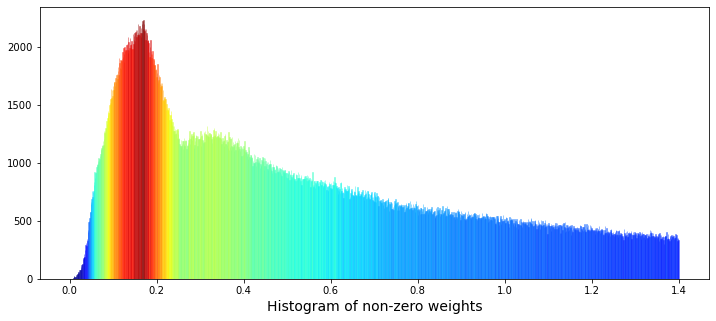

In [25]:
plt.figure(figsize = (12,5))
ax = sns.distplot(train_data['weight'], 
             bins=1400, 
             kde_kws={"clip":(0.001,1.4)}, 
             hist_kws={"range":(0.001,1.4)},
             color='darkcyan', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of non-zero weights", size=14)
plt.show();
del values
gc.collect();

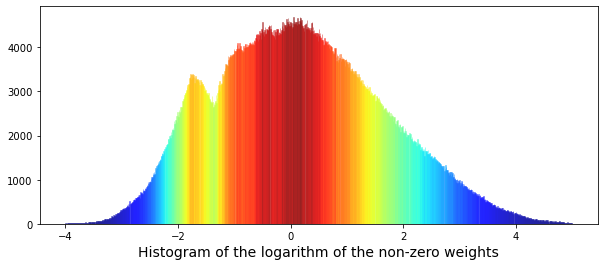

In [27]:
train_data_nonZero = train_data.query('weight > 0').reset_index(drop = True)
plt.figure(figsize = (10,4))
ax = sns.distplot(np.log(train_data_nonZero['weight']), 
             bins=1000, 
             kde_kws={"clip":(-4,5)}, 
             hist_kws={"range":(-4,5)},
             color='darkcyan', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the logarithm of the non-zero weights", size=14)
plt.show();
gc.collect();

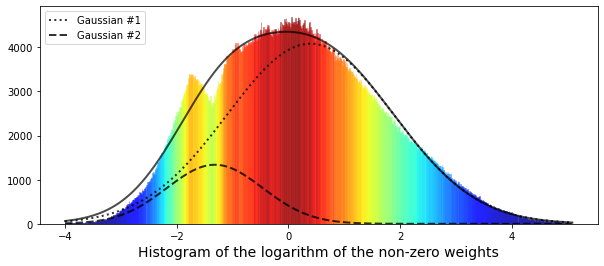

In [28]:
from scipy.optimize import curve_fit
# the values
x = list(range(len(values)))
x = [(i/110)-4 for i in x]
y = values

# define a Gaussian function
def Gaussian(x,mu,sigma,A):
    return A*np.exp(-0.5 * ((x-mu)/sigma)**2)

def bimodal(x,mu_1,sigma_1,A_1,mu_2,sigma_2,A_2):
    return Gaussian(x,mu_1,sigma_1,A_1) + Gaussian(x,mu_2,sigma_2,A_2)

# seed guess
initial_guess=(1, 1 , 1,    1, 1, 1)

# the fit
parameters,covariance=curve_fit(bimodal,x,y,initial_guess)
sigma=np.sqrt(np.diag(covariance))

# the plot
plt.figure(figsize = (10,4))
ax = sns.distplot(np.log(train_data_nonZero['weight']), 
             bins=1000, 
             kde_kws={"clip":(-4,5)}, 
             hist_kws={"range":(-4,5)},
             color='darkcyan', 
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the logarithm of the non-zero weights", size=14)
# plot gaussian #1
plt.plot(x,Gaussian(x,parameters[0],parameters[1],parameters[2]),':',color='black',lw=2,label='Gaussian #1', alpha=0.8)
# plot gaussian #2
plt.plot(x,Gaussian(x,parameters[3],parameters[4],parameters[5]),'--',color='black',lw=2,label='Gaussian #2', alpha=0.8)
# plot the two gaussians together
plt.plot(x,bimodal(x,*parameters),color='black',lw=2, alpha=0.7)
plt.legend(loc="upper left");
plt.show();
del values
gc.collect();

### return(actually the real)

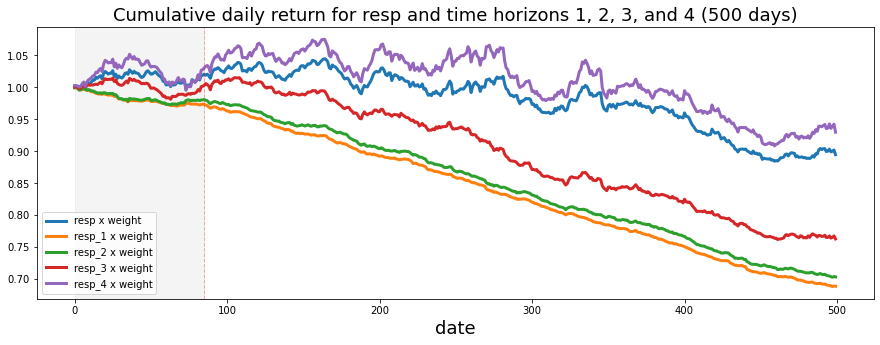

In [29]:
train_data['weight_resp']   = train_data['weight']*train_data['resp']
train_data['weight_resp_1'] = train_data['weight']*train_data['resp_1']
train_data['weight_resp_2'] = train_data['weight']*train_data['resp_2']
train_data['weight_resp_3'] = train_data['weight']*train_data['resp_3']
train_data['weight_resp_4'] = train_data['weight']*train_data['resp_4']

fig, ax = plt.subplots(figsize=(15, 5))
resp    = pd.Series(1+(train_data.groupby('date')['weight_resp'].mean())).cumprod()
resp_1  = pd.Series(1+(train_data.groupby('date')['weight_resp_1'].mean())).cumprod()
resp_2  = pd.Series(1+(train_data.groupby('date')['weight_resp_2'].mean())).cumprod()
resp_3  = pd.Series(1+(train_data.groupby('date')['weight_resp_3'].mean())).cumprod()
resp_4  = pd.Series(1+(train_data.groupby('date')['weight_resp_4'].mean())).cumprod()
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Cumulative daily return for resp and time horizons 1, 2, 3, and 4 (500 days)", fontsize=18)
resp.plot(lw=3, label='resp x weight')
resp_1.plot(lw=3, label='resp_1 x weight')
resp_2.plot(lw=3, label='resp_2 x weight')
resp_3.plot(lw=3, label='resp_3 x weight')
resp_4.plot(lw=3, label='resp_4 x weight')
# day 85 marker
ax.axvline(x=85, linestyle='--', alpha=0.3, c='red', lw=1)
ax.axvspan(0, 85 , color=sns.xkcd_rgb['grey'], alpha=0.1)
plt.legend(loc="lower left");

---

- NaN(missing values)

In [10]:
# Display missing values per column
missing_table = pd.DataFrame({c:(train_df[c].isna().sum()/len(train_df))*100 for c in train_df.columns},
                             index=["% missing values"])
missing_table

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
% missing values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.922161,0.009329,0.009329,0.672791,0.672791,0.370342,0.370342,0.08036,0.08036,0.0


% missing values    feature_17
dtype: object % missing values    16.546182
dtype: float64


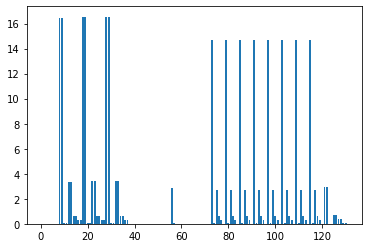

In [11]:
print(missing_table.idxmax(axis=1), missing_table.max(axis=1))
# bar plot
temp = []
for i in range(130):
    temp.append(missing_table["feature_{}".format(i)][0])
plt.bar(np.linspace(1, 130, 130), temp)
plt.show()

- distribution

In [23]:
# # Display the histogram 
# fig, axes = plt.subplots(nrows=45,ncols=3,figsize=(25,250))
# for i in range(2,137): #resp ~ features
#     sns.distplot(train_df.iloc[:,i],
#                  ax=axes[(i-2)//3,(i-2)%3])

In [13]:
# Compute the correlation between pair features.
correlation_table = train_df[[train_df.columns[i] for i in range(2,137)]].corr()

In [14]:
correlation_table

,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
resp_1,1.000000,0.890214,0.678381,0.358949,0.452159,-0.005225,0.052593,0.040352,0.019656,0.017653,...,0.031172,0.008115,0.038014,0.015601,0.033879,0.010208,0.034311,0.012399,0.036101,0.013916
resp_2,0.890214,1.000000,0.823383,0.469230,0.595274,-0.011439,0.040820,0.029895,0.019778,0.018396,...,0.027566,0.005861,0.032482,0.011600,0.029830,0.007413,0.030119,0.009378,0.031239,0.010492
resp_3,0.678381,0.823383,1.000000,0.805952,0.815972,-0.003427,0.027175,0.019369,-0.002900,-0.000158,...,0.020578,0.002388,0.023501,0.006365,0.021938,0.002907,0.022115,0.004440,0.022653,0.005377
resp_4,0.358949,0.469230,0.805952,1.000000,0.956197,-0.013900,0.015942,0.009707,-0.008157,-0.008646,...,0.015119,-0.001891,0.016562,0.001094,0.015845,-0.001690,0.015990,-0.000614,0.016156,0.000227
resp,0.452159,0.595274,0.815972,0.956197,1.000000,-0.023726,0.019802,0.011883,0.003608,0.000500,...,0.018552,-0.001682,0.020313,0.001857,0.019478,-0.001211,0.019669,0.000084,0.019902,0.000985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_125,0.010208,0.007413,0.002907,-0.001690,-0.001211,-0.000013,-0.033898,0.060913,0.003318,0.007644,...,0.194412,0.923079,0.176827,0.763360,0.223518,1.000000,0.215469,0.959696,0.190535,0.845525
feature_126,0.034311,0.030119,0.022115,0.015990,0.019669,0.014965,0.444440,0.198910,0.035190,0.018581,...,0.940733,0.154048,0.944771,0.174386,0.981306,0.215469,1.000000,0.238846,0.976216,0.208569
feature_127,0.012399,0.009378,0.004440,-0.000614,0.000084,0.000141,-0.029859,0.066827,0.006319,0.011980,...,0.153538,0.834156,0.221086,0.839202,0.206512,0.959696,0.238846,1.000000,0.237858,0.930648
feature_128,0.036101,0.031239,0.022653,0.016156,0.019902,0.015261,0.438417,0.200525,0.037467,0.021256,...,0.902448,0.131156,0.983554,0.261358,0.942911,0.190535,0.976216,0.237858,1.000000,0.278017


In [15]:
def detect_correlated_features(df,threshold=0.5):
    """This function will try detect features who have correlation grower than the introduced 
     threshold value.
     
     @param df(DataFrame): The dataframe who resume the correlation values between features.
     @param threshold(int) : the threshold that the function, will use as reference to detect
                             correlated features.
     @return list(List): list of tuple, who resume features that have correlation grower than
                           the introduced threshold.
     """
    correlated= defaultdict(list)
    for col in df.columns:
        dex = list(df.columns).index(col)
        for ind in df.index[dex+1:] :
            if df.loc[col,ind] > threshold:
                correlated[col].append(ind)
                
    return correlated

In [17]:
# Detect the highly correlated features.Which they had coefficient correlation grower than 0.9.
from  collections import defaultdict
correlated_features = detect_correlated_features(correlation_table,threshold=0.9)

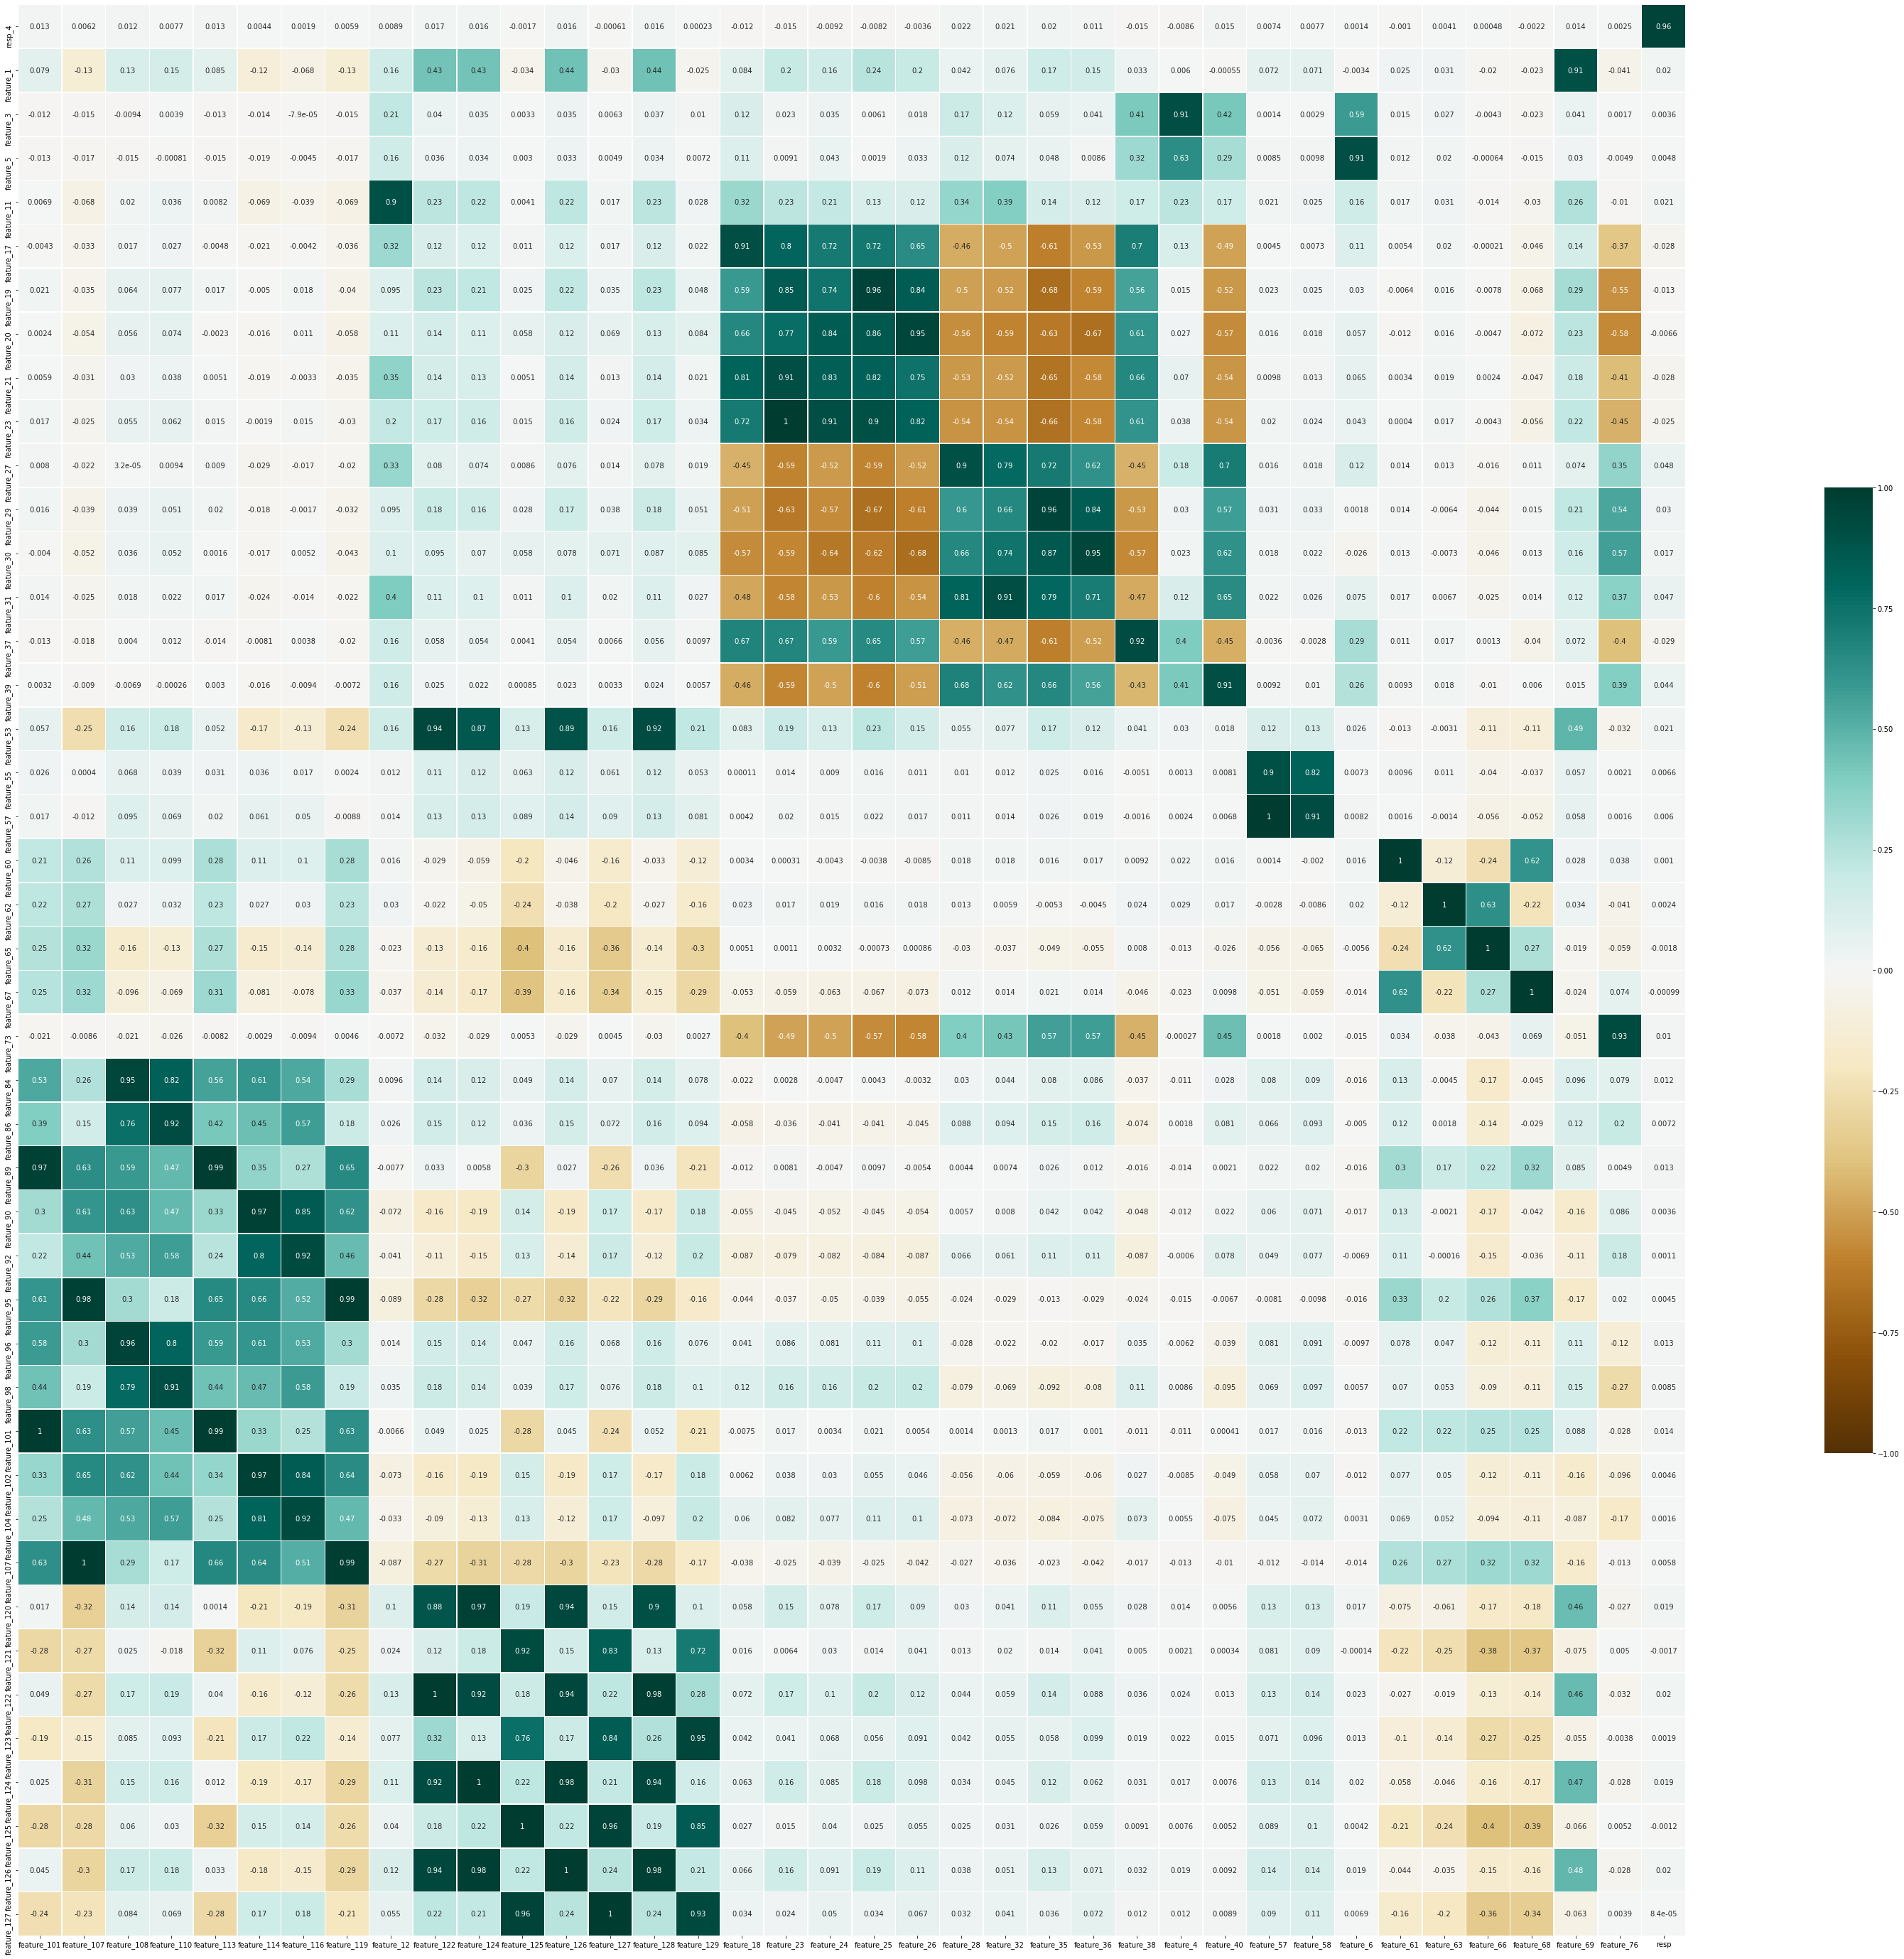

In [19]:
# Display a table showing the high correlated features.
ax_features = correlated_features.keys()
ay_features = []
for f in correlated_features.values():
    ay_features.extend(f)
ay_features = np.unique(ay_features)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(70,50))
sns.heatmap(correlation_table.loc[ax_features,ay_features],
            cmap='BrBG',annot=True,square=True,vmin=-1,vmax=1,
            linewidths=0.5,cbar_kws={"shrink": .5})

In [21]:
f.savefig("test.png")

- drop

In [22]:
# List of features to drop because of they are highly correlated 
# with others features in the train dataset.
features_to_drop = [f for f in ay_features if f not in ax_features]

In [25]:
# train datas after removing features assigned to drop list of columns.
train_df = train_df[[ f for f in list(train_df.columns) if ((f not in features_to_drop) or (f =="resp"))]]

In [26]:
# Compute the correlation betwen the features named resp, and the reste of features
label_correlation = pd.DataFrame({c:train_df["resp"].corr(train_df[c]) for\
                                  c in train_df.columns if c!="resp"},index=["action"])

In [27]:
label_correlation

,date,weight,resp_1,resp_2,resp_3,resp_4,feature_0,feature_1,feature_2,feature_3,...,feature_118,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,ts_id
action,-0.00759,-0.006948,0.452159,0.595274,0.815972,0.956197,-0.023726,0.019802,0.011883,0.003608,...,-0.001882,0.018552,-0.001682,0.020313,0.001857,0.019478,-0.001211,0.019669,0.000084,-0.007526


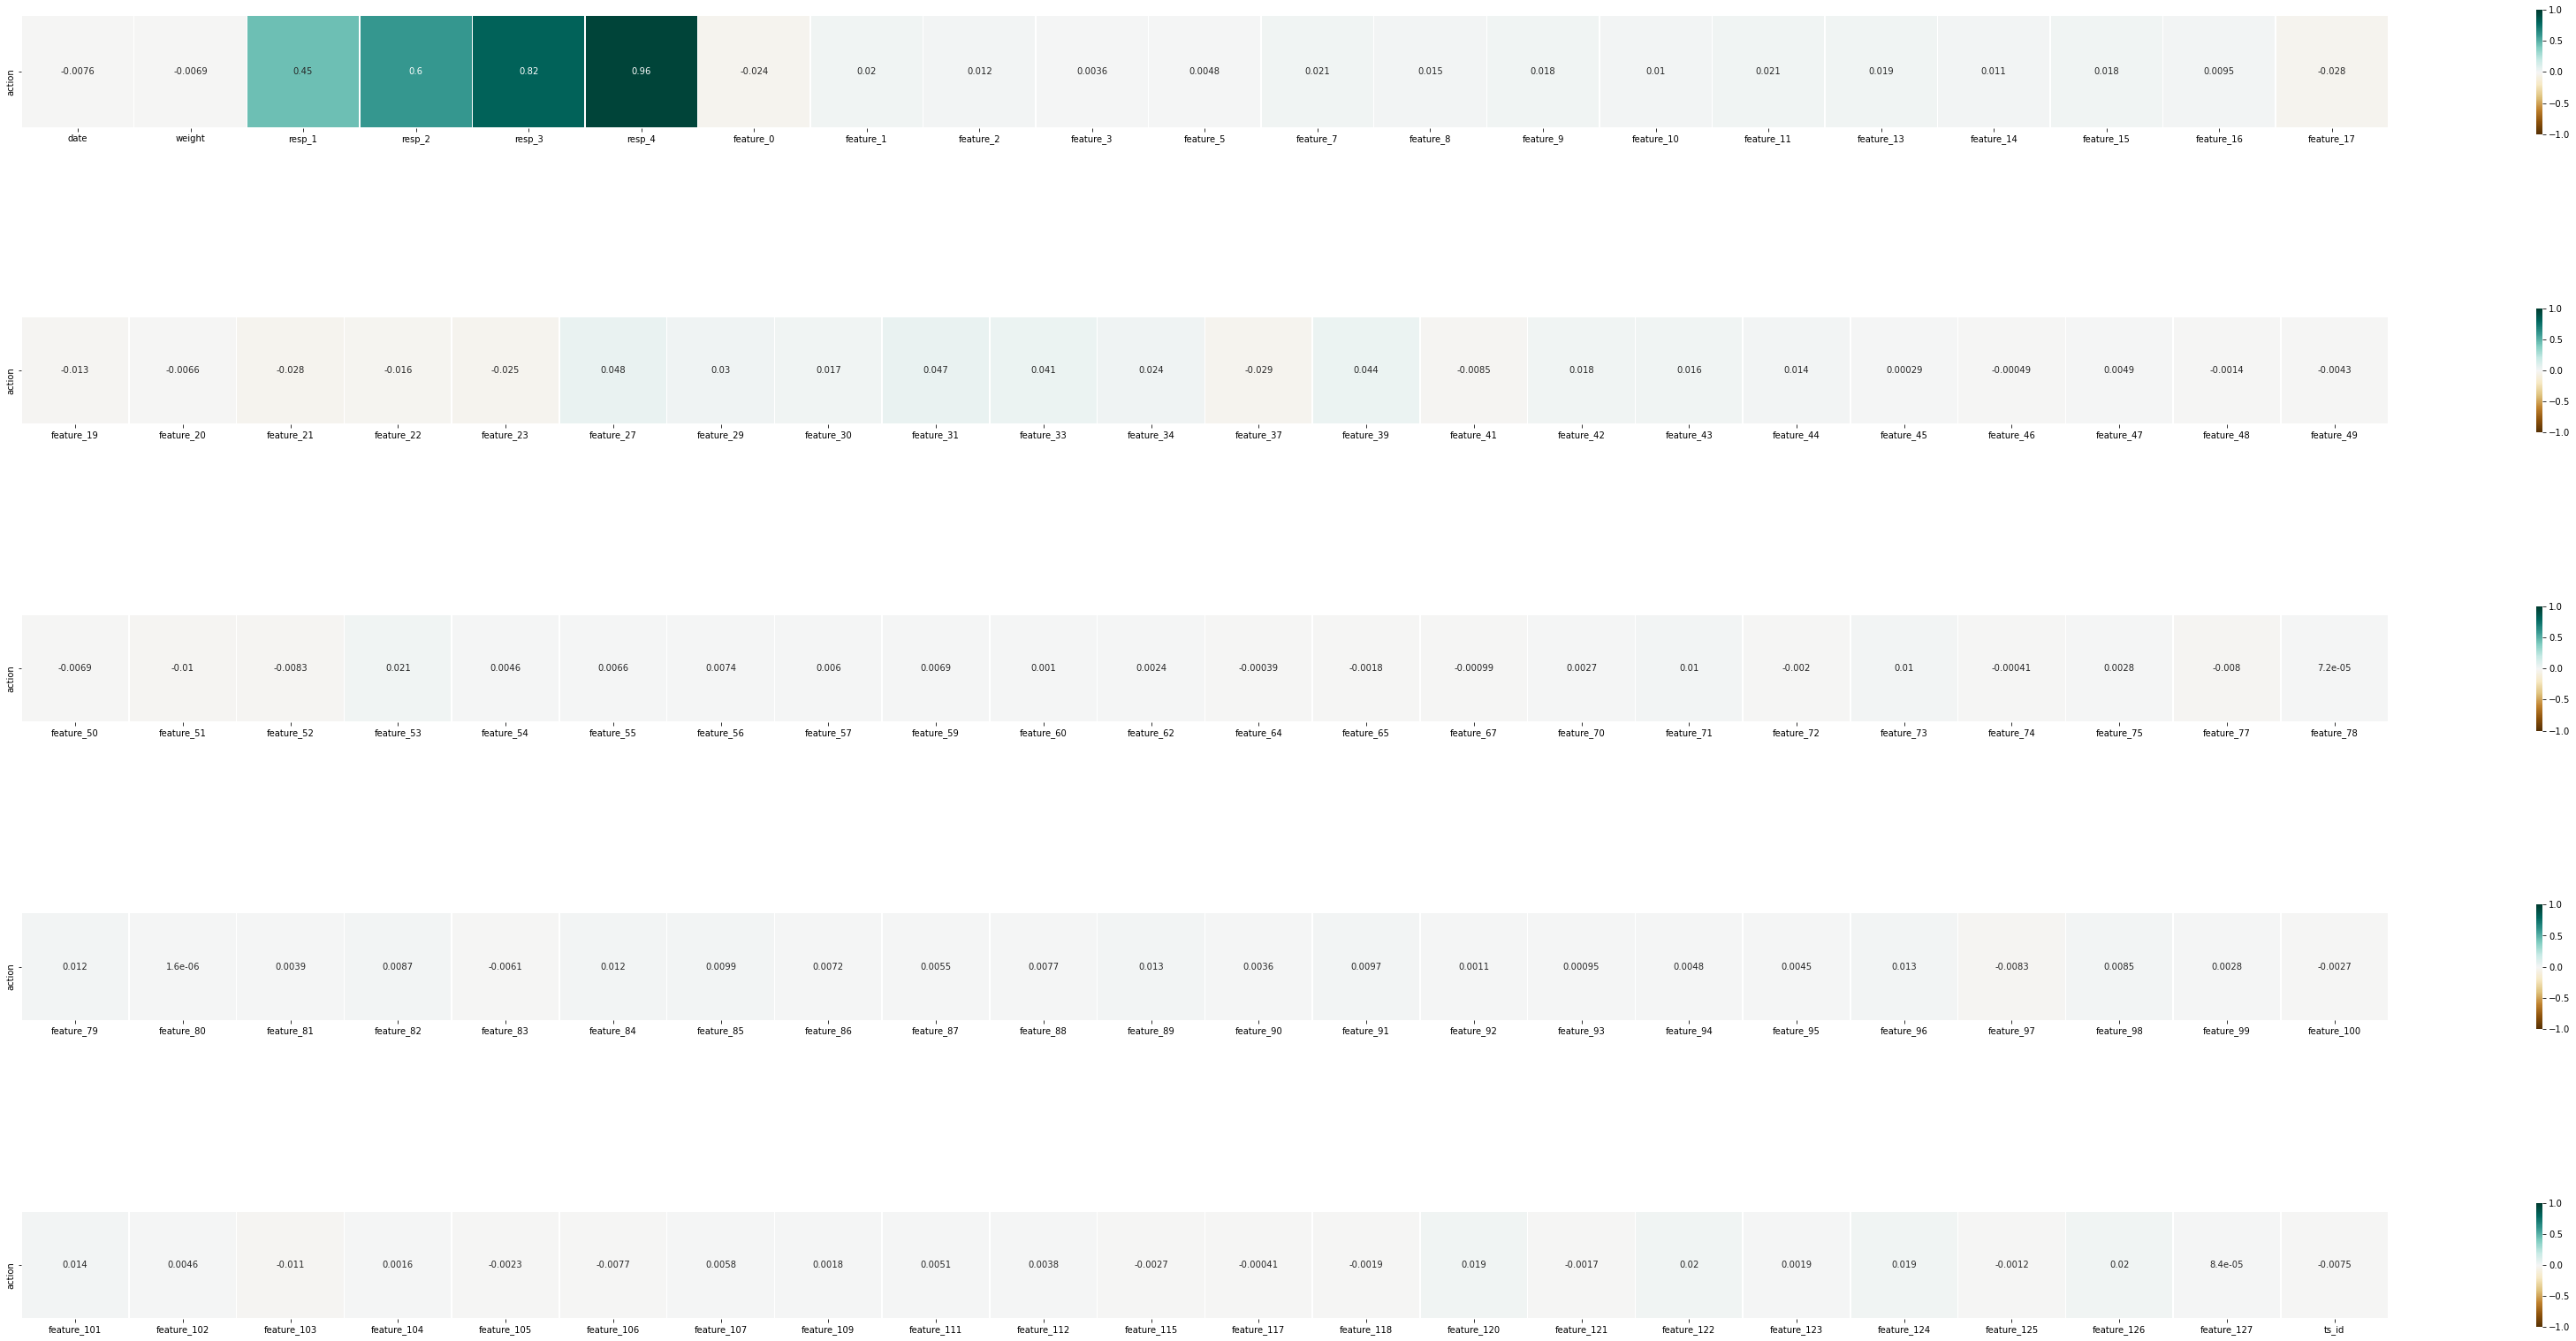

In [28]:
# Visualize the correlation in a table named label_correlation.
l = len(list(label_correlation.columns)) 
# compute the number  of features for label_correlation dataset
col = list(label_correlation.columns) 
# list of columns names of label_correlation dataset

# Because of , the high number of features in our dataset, we will try divide them into 5,
# in order to get more clear chart.
fig ,axes = plt.subplots(nrows=5,ncols=1,figsize=(60,30))
level = [0,int(l/5),int(2*l/5),int(3*l/5),int(4*l/5),l]
for i in range(len(level)-1):
    sns.heatmap(label_correlation.loc[:,col[level[i]:level[i+1]]],
                annot=True,cmap='BrBG',linewidths=0.5,vmin=-1,vmax=1,
                cbar_kws={"shrink": .5},square=True,ax=axes[i])

- fill

In [29]:
# Display train_df missing values before imputations.
missing_b_imputation = pd.DataFrame({c:(train_df[c].isna().sum()) for c in train_df.columns},index=["% missing values"])
print("The number of missing values in the train_df dataframe before imputation processing :{}".format(\
                                                                                                      missing_b_imputation.sum().sum()))
missing_b_imputation

The number of missing values in the train_df dataframe before imputation processing :4926085


,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_118,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,ts_id
% missing values,0,0,0,0,0,0,0,0,0,0,...,6683,69854,69854,223,223,16083,16083,8853,8853,0


In [30]:
# identify , which column has missing values in the new dataset named train_df

features_with_missing_values = [] # list of features , has missing values.
    
for f in list(train_df.columns):
    if missing_table.loc["% missing values",f] > 0 :
        features_with_missing_values.append(f)

In [ ]:
# train a linear model regression for each feature, had missing values with his one of correlated
# feature

from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE as tsne
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


for f in features_with_missing_values :
    model = LinearRegression()
    if  len(correlated_features[f]) > 0 :
        correlated = correlated_features[f][0]
        if correlated in train.columns :
            model.fit(train.loc[(train[correlated].notna()) & (train[f].notna()),correlated].values.reshape(-1,1),\
                train.loc[(train[correlated].notna()) & (train[f].notna()),f])
            values_to_impute = train_df.loc[(train[f].isna()) & (train[correlated].notna()),f]
            imputer = train.loc[(train[f].isna())&(train[correlated].notna()),correlated].values
            if (len(values_to_impute) > 0) & (len(imputer) > 0) :
                train_df.loc[(train[f].isna()) & (train[correlated].notna()),f] = model.predict(train.loc[(train[f].isna())&(train[correlated].notna()),correlated].values.\
                                                      reshape(-1,1))
    

### preprocessing

In [ ]:
# train datas after removing features assigned to drop list of columns.
train_df = train[[ f for f in list(train.columns) if ((f not in features_to_drop) or (f =="resp"))]]

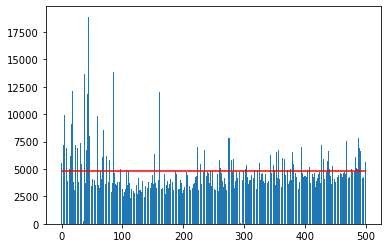

max time step : 18884
min time step : 29
mean time step : 4780.982
how much under the mean value : 64.60000000000001%


In [23]:
# timesteps by day
day_list = []
timestep_list = []
for i in range(500):
    day_list.append(i)
    timestep_list.append(len(train.query('date == {}'.format(i))))

timestep_list = np.array(timestep_list)
mean_val = sum(timestep_list)/len(timestep_list)
plt.bar(day_list, timestep_list)
plt.plot(day_list, [mean_val]*len(day_list), 'red')
plt.show()

print(f"max time step : {max(timestep_list)}")
print(f"min time step : {min(timestep_list)}")
print(f"mean time step : {mean_val}")
print(f"how much under the mean value : {len(timestep_list[timestep_list<mean_val])/len(timestep_list)*100}%")

In [13]:
# 하나만 뽑아서 보기
sample_train = train.query('date == 0')

In [14]:
sample_train

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,0,33.114851,0.009417,0.009417,0.009417,0.012766,0.012787,1,-0.259037,-0.391882,...,-1.968269,-0.961742,1.604044,-1.507539,-1.163956,-1.921212,0.353259,-1.306408,1.087192,5582
5583,0,24.717850,0.005481,0.005481,0.005481,0.003882,0.003893,1,1.708366,1.313385,...,-2.445579,0.520711,7.055120,-1.641776,-1.425923,-2.048651,0.391530,-0.424127,3.803231,5583
5584,0,0.935702,0.009550,0.009550,0.009550,-0.000932,0.001002,1,0.187393,-0.965020,...,-1.924877,0.858199,0.657809,-0.197027,-1.832238,0.322328,-0.308901,1.045401,0.740898,5584
5585,0,0.474089,0.004016,0.004016,0.004016,0.005888,0.006608,1,2.481597,1.769018,...,-2.964383,0.347743,0.879486,-0.849308,-2.858006,-0.802849,-1.217617,0.173027,0.492465,5585


In [15]:
# sample_train.describe()

In [16]:
# NaN인 부분들을 평균으로 채움
sample_train = sample_train.apply(lambda x: x.fillna(x.mean()),axis=0)

In [17]:
sample_train

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,-0.677243,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,-0.677243,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,-0.677243,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,-0.677243,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,-0.677243,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,0,33.114851,0.009417,0.009417,0.009417,0.012766,0.012787,1,-0.259037,-0.391882,...,-1.968269,-0.961742,1.604044,-1.507539,-1.163956,-1.921212,0.353259,-1.306408,1.087192,5582
5583,0,24.717850,0.005481,0.005481,0.005481,0.003882,0.003893,1,1.708366,1.313385,...,-2.445579,0.520711,7.055120,-1.641776,-1.425923,-2.048651,0.391530,-0.424127,3.803231,5583
5584,0,0.935702,0.009550,0.009550,0.009550,-0.000932,0.001002,1,0.187393,-0.965020,...,-1.924877,0.858199,0.657809,-0.197027,-1.832238,0.322328,-0.308901,1.045401,0.740898,5584
5585,0,0.474089,0.004016,0.004016,0.004016,0.005888,0.006608,1,2.481597,1.769018,...,-2.964383,0.347743,0.879486,-0.849308,-2.858006,-0.802849,-1.217617,0.173027,0.492465,5585


In [18]:
sample_train.shape

(5587, 138)

### features 0~129
- [Momentum Based Startgies](https://www.investopedia.com/trading/introduction-to-momentum-trading/)
- [Zero/Mean Reverted Startgies](https://decodingmarkets.com/mean-reversion-trading-strategy/)

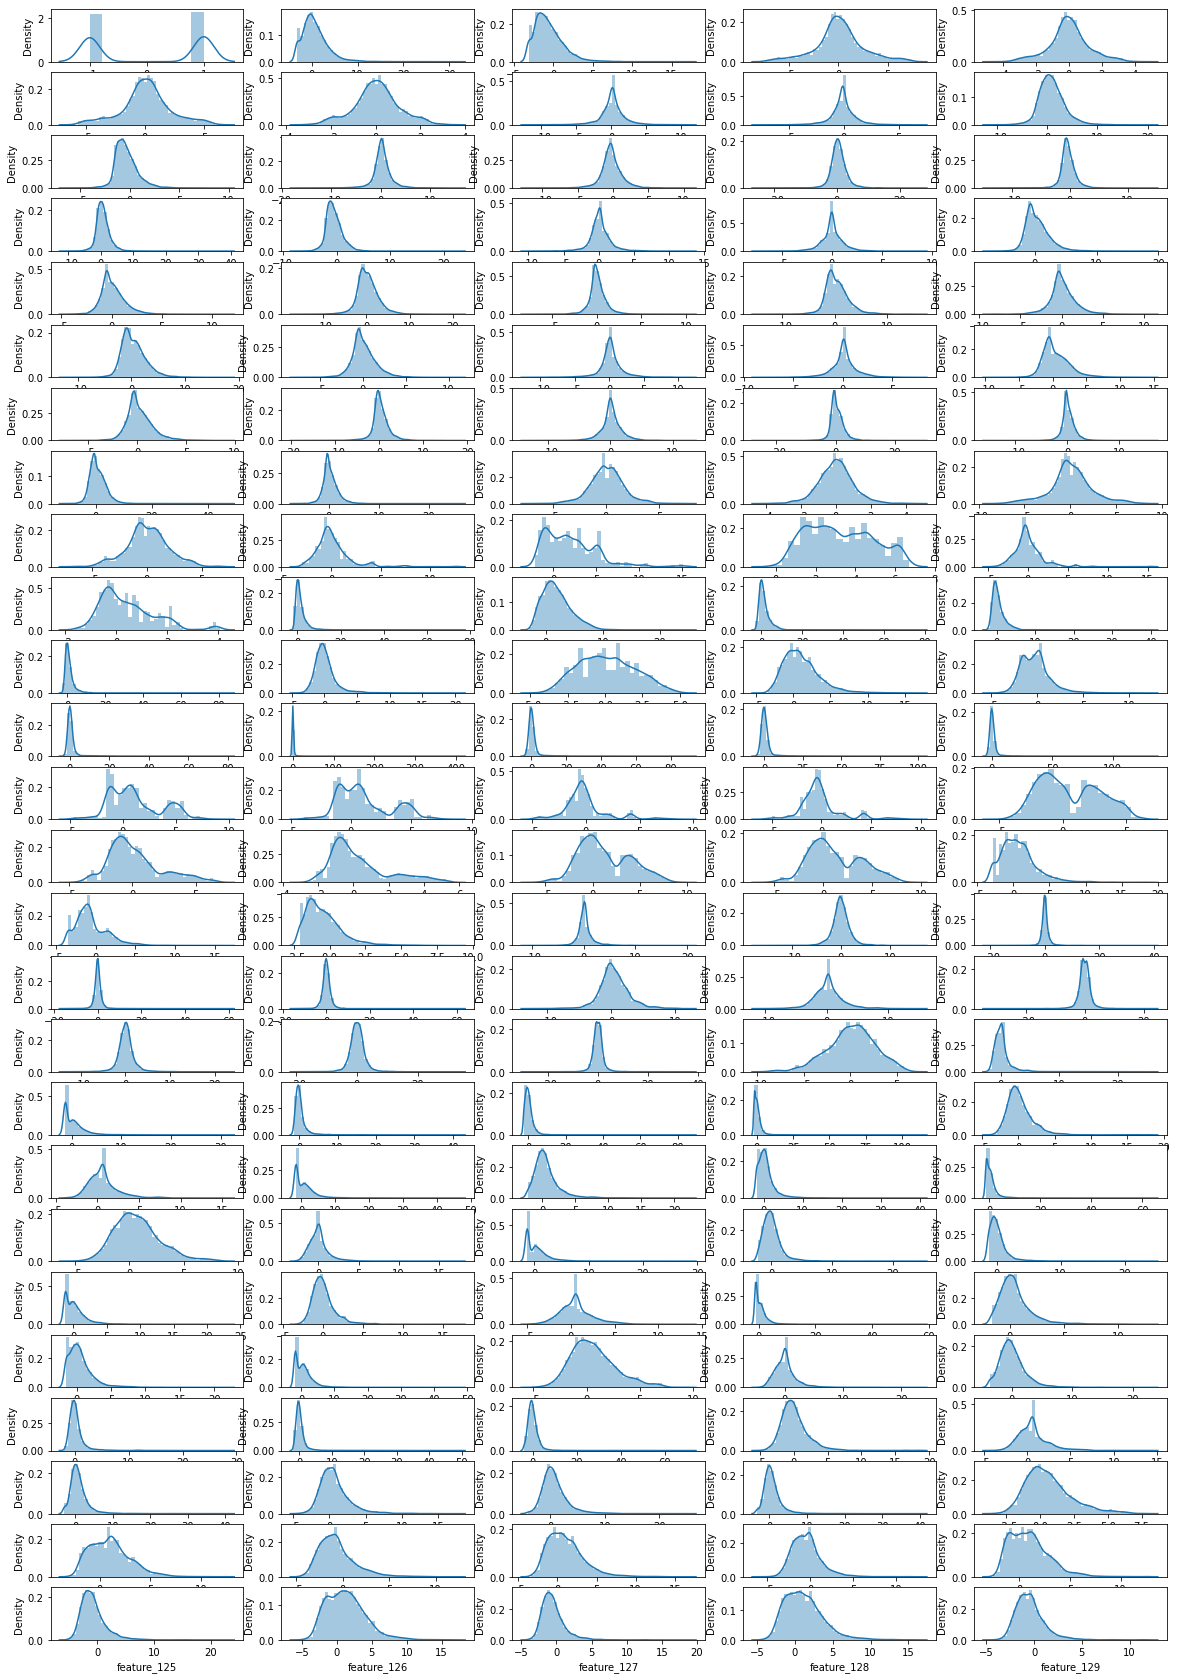

In [19]:
fig, axes = plt.subplots(nrows=26, ncols=5,figsize=(20,30))
# features plot 130개 5 26
for i, column in enumerate(sample_train.iloc[:,7:-1].columns):
    sns.distplot(sample_train[column],ax=axes[i//5,i%5])

### weight

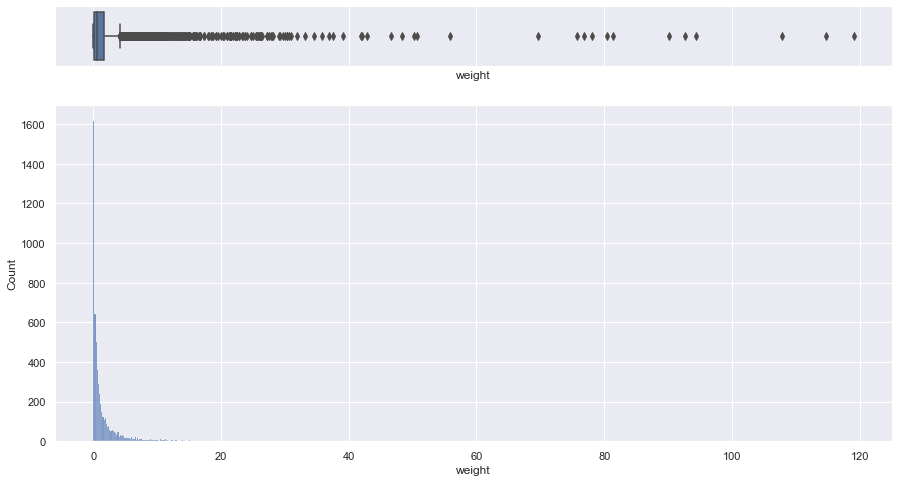

In [20]:
sns.set(rc={'figure.figsize':(15,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(sample_train["weight"], ax=ax_box)
sns.histplot(sample_train["weight"])

### resp 1~4 and resp
- Resp1 ~ Resp4 are the extension of Resp
- "The only response variable in evaluation is Resp (see the evaluation metric), Resp1 - Resp4 only exists in the train.csv, they are correlated to Resp but not exactly the same (see the data description). They are provided just in case some people want some alternative objective metrics to regularize their model training."

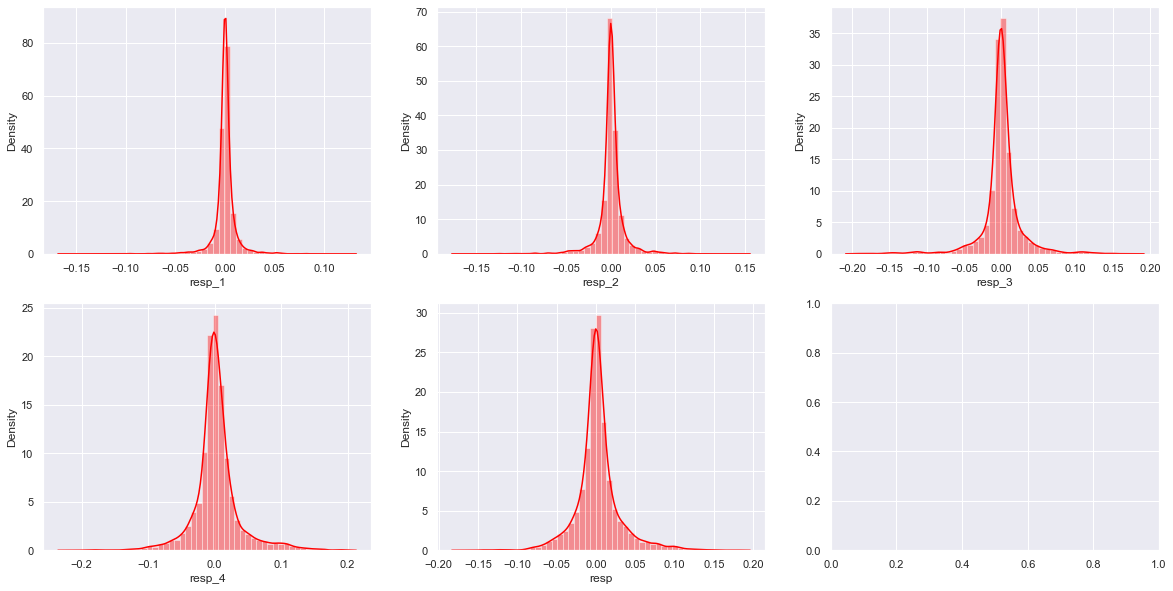

In [21]:
resp_sample = sample_train.iloc[:,2:7]
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i, column in enumerate(resp_sample.columns):
    sns.distplot(sample_train[column],ax=axes[i//3,i%3],color='red')

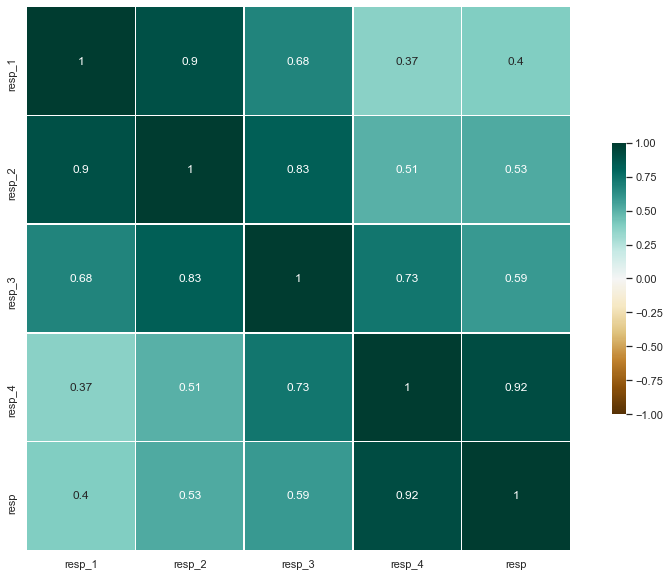

In [22]:
corr = resp_sample.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='BrBG',  center=0,vmin=-1, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

feature resp_4 has the highest positive correlation with feature resp and feature resp_1 has least positive correlation with feature resp.

### resp and wight

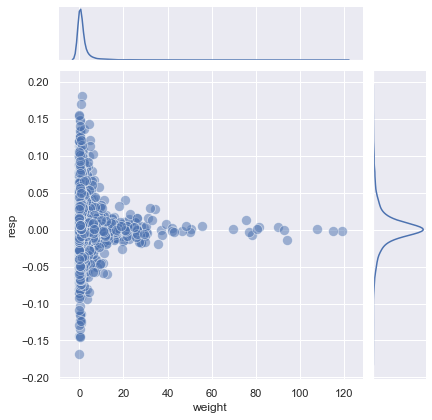

In [23]:
g = sns.JointGrid(data=sample_train, x="weight", y="resp")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.kdeplot)

## features.csv

- metadata

In [24]:
features = pd.read_csv('./features.csv')
ex_test = pd.read_csv('./example_test.csv')
ex_submission = pd.read_csv('./example_sample_submission.csv')

In [25]:
features.head()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [26]:
features.info()
# 빈거 없음
# 30 columns = feature + tag(0~28) = 1+29 = 30
# 130개 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  130 non-null    object
 1   tag_0    130 non-null    bool  
 2   tag_1    130 non-null    bool  
 3   tag_2    130 non-null    bool  
 4   tag_3    130 non-null    bool  
 5   tag_4    130 non-null    bool  
 6   tag_5    130 non-null    bool  
 7   tag_6    130 non-null    bool  
 8   tag_7    130 non-null    bool  
 9   tag_8    130 non-null    bool  
 10  tag_9    130 non-null    bool  
 11  tag_10   130 non-null    bool  
 12  tag_11   130 non-null    bool  
 13  tag_12   130 non-null    bool  
 14  tag_13   130 non-null    bool  
 15  tag_14   130 non-null    bool  
 16  tag_15   130 non-null    bool  
 17  tag_16   130 non-null    bool  
 18  tag_17   130 non-null    bool  
 19  tag_18   130 non-null    bool  
 20  tag_19   130 non-null    bool  
 21  tag_20   130 non-null    bool  
 22  ta

In [27]:
from collections import defaultdict
categories =  defaultdict(list)

for columns  in features.columns[1:]:
        categories[f'{columns}'].append(features.query(f'{columns} == True')['feature'].to_list())

In [28]:
tag_0_df = sample_train[[*categories['tag_0'][0]]]

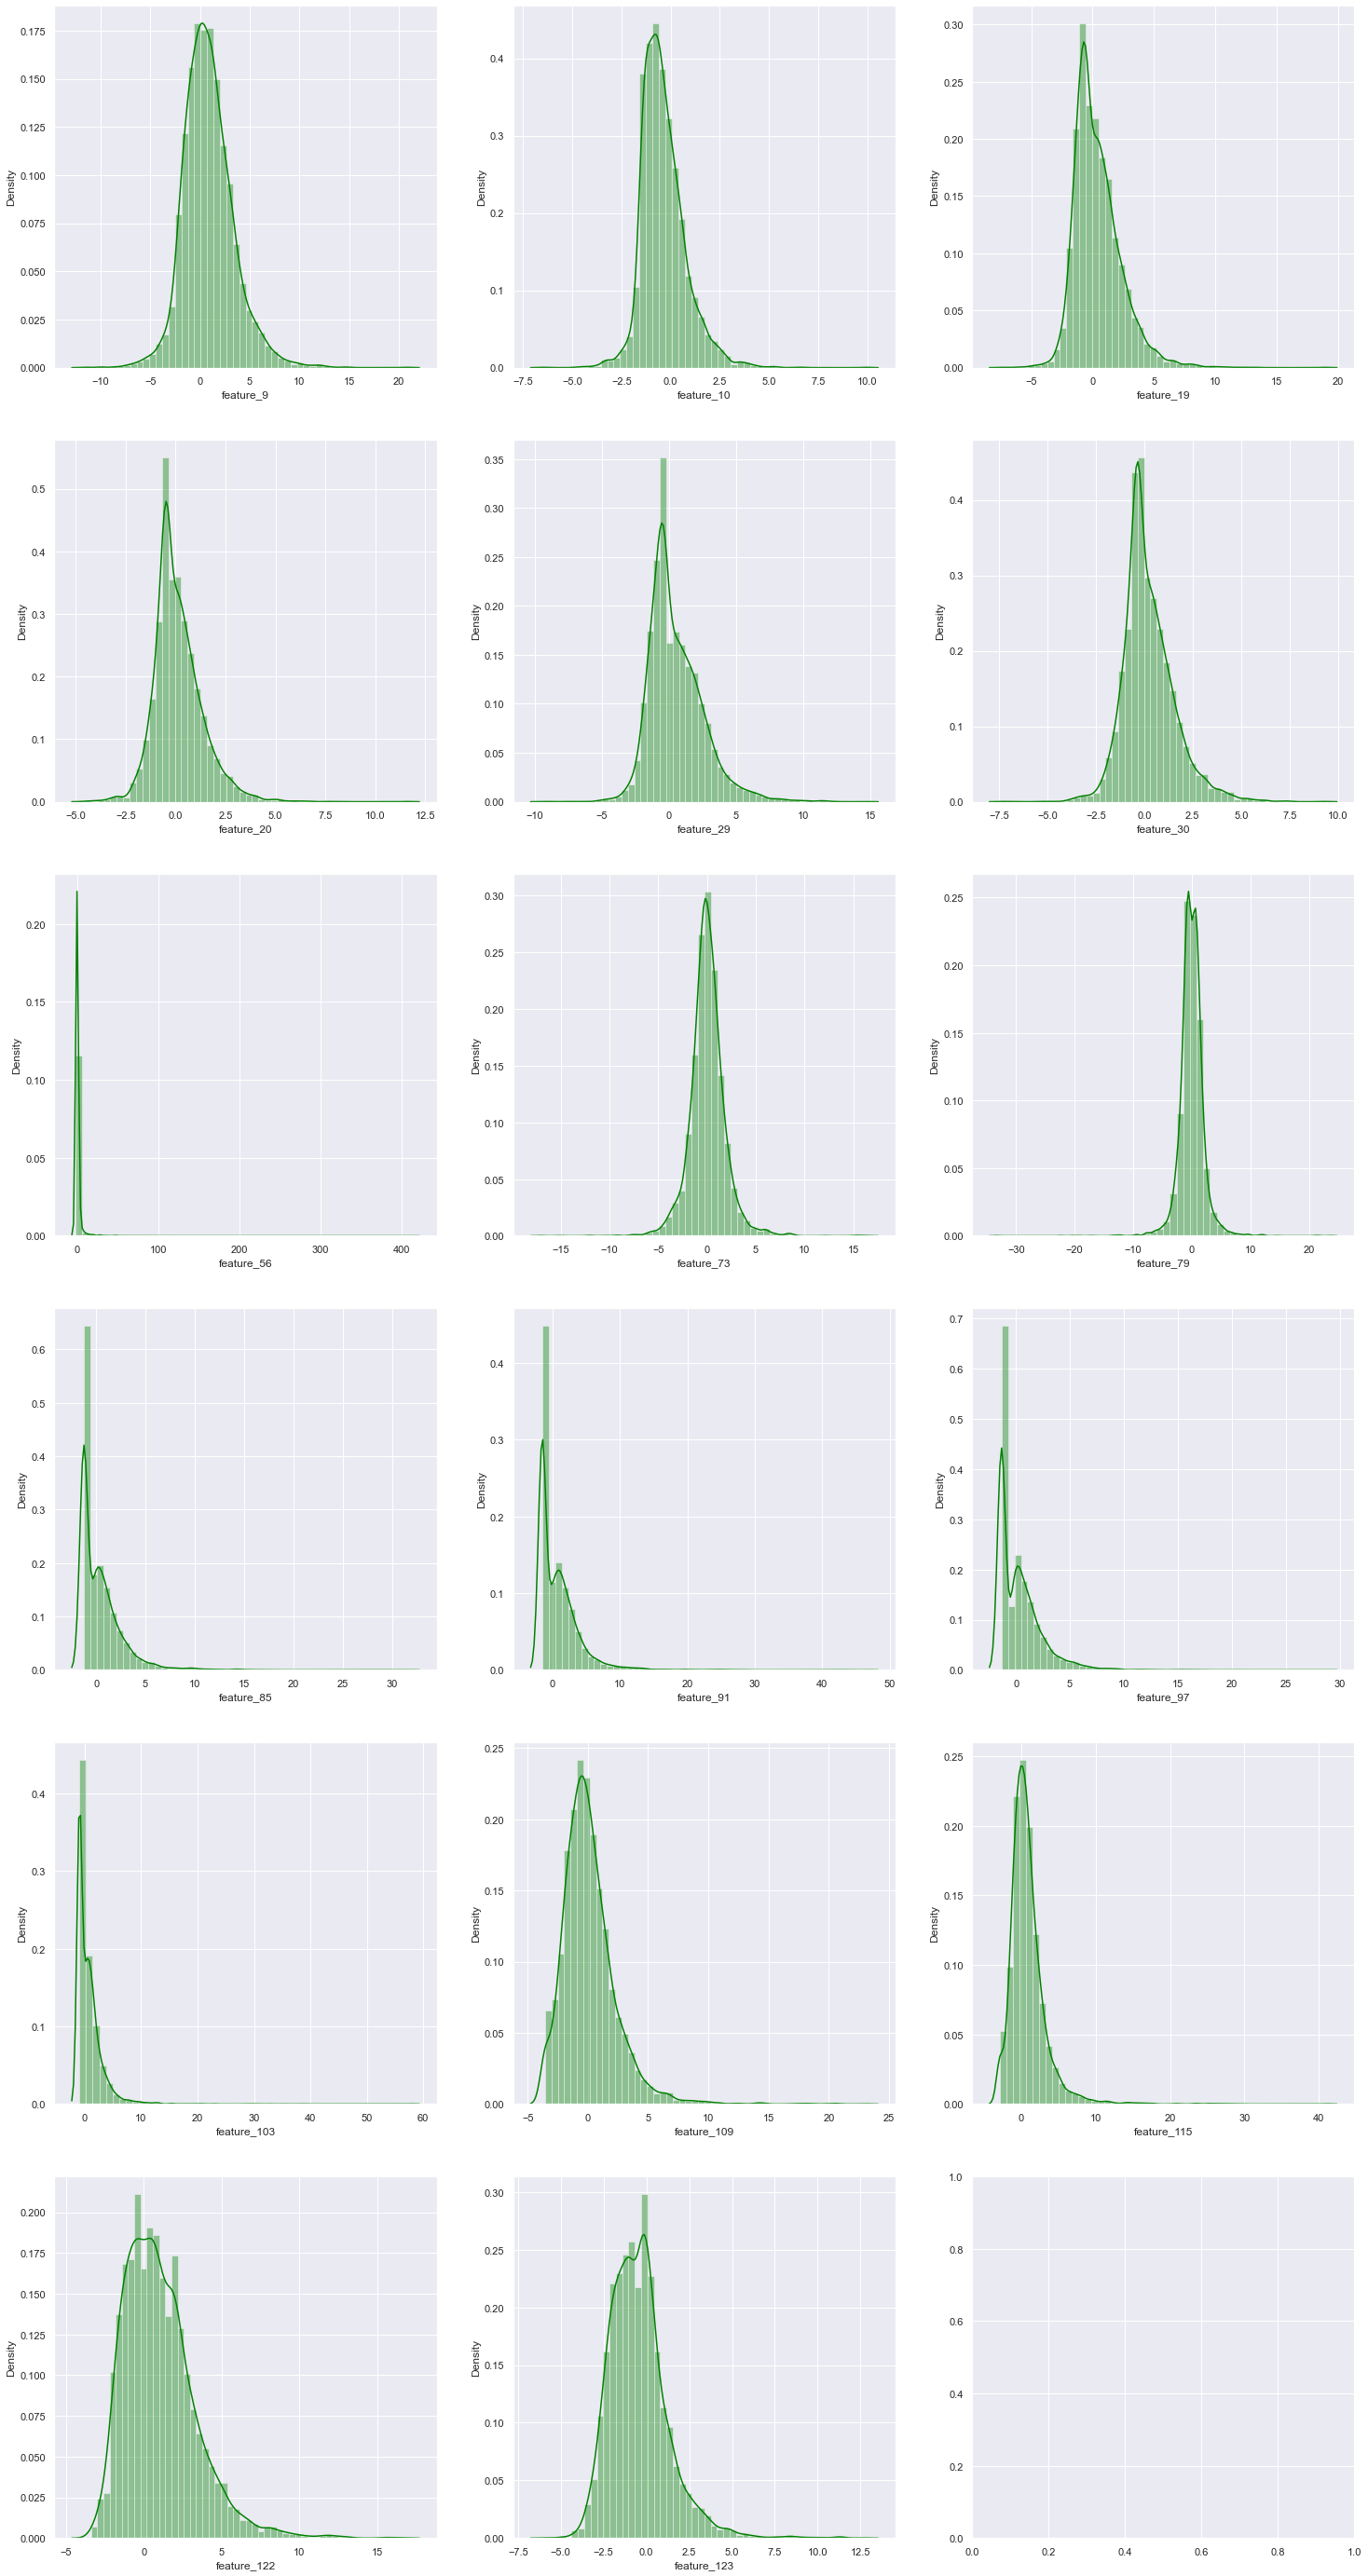

In [29]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(25,50))

for i, column in enumerate(tag_0_df.columns):
    sns.distplot(tag_0_df[column],ax=axes[i//3,i%3],color='Green')

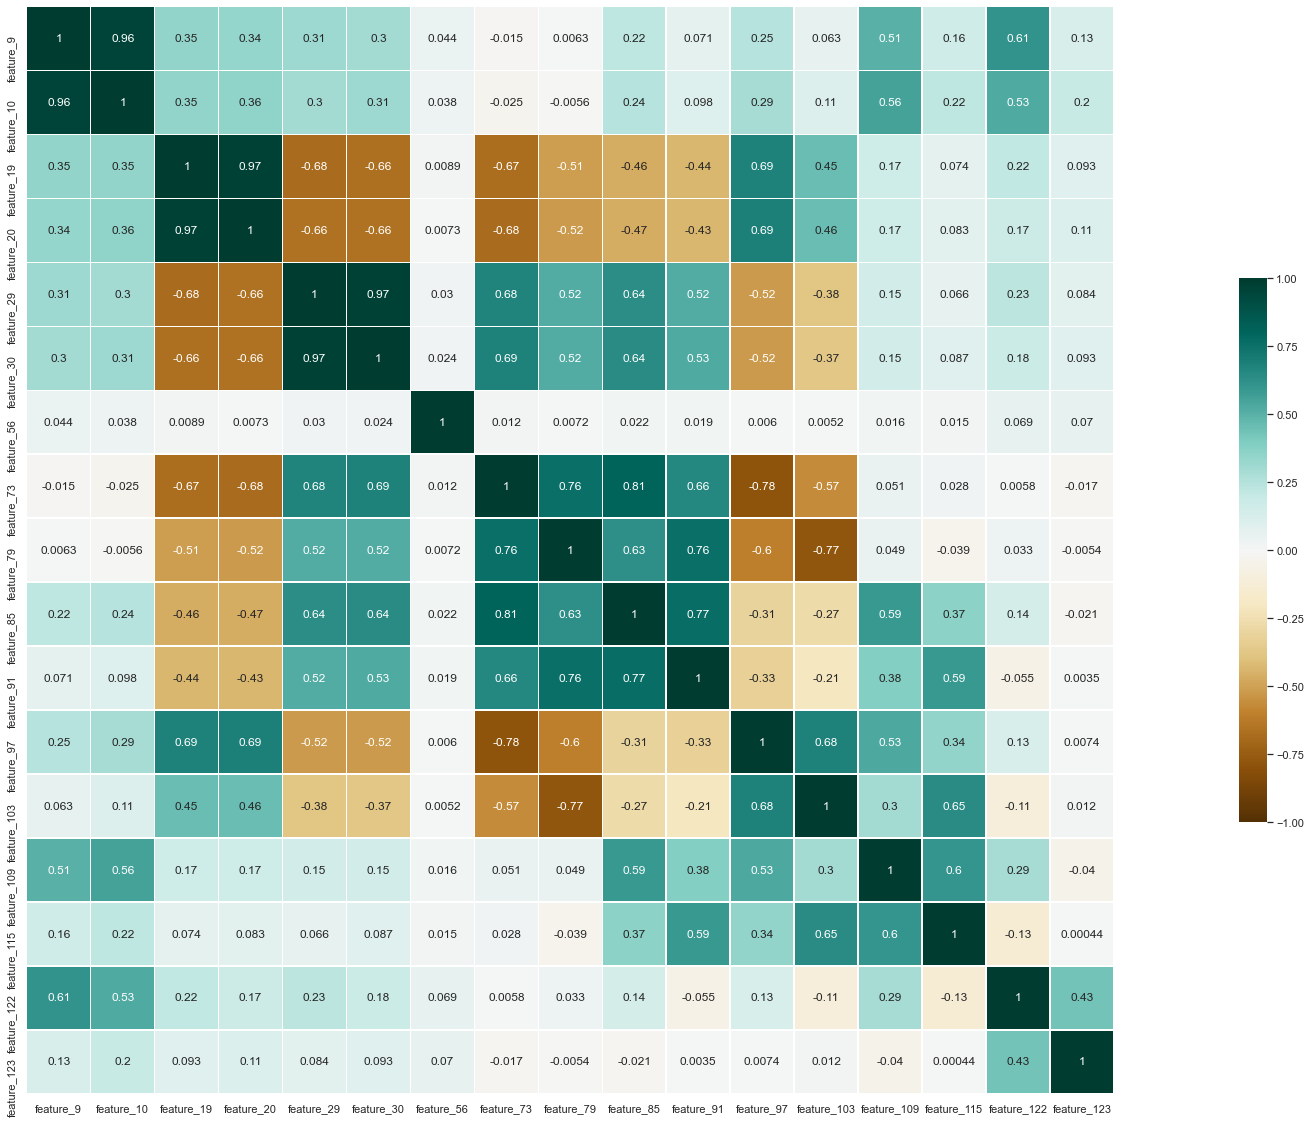

In [30]:
corr = tag_0_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(45, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='BrBG',  center=0,vmin=-1, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
# from scipy import stats
# def r2(x, y):
#     return stats.pearsonr(x, y)[0] ** 2

In [32]:
# import seaborn as sns
# class myjoint(sns.JointGrid):
#     def __init__(self, x, y, data=None,height=7, ratio=5, space=.2,
#                  dropna=True, xlim=None, ylim=None, size=None):
#         super(myjoint, self).__init__(x, y, data,height, ratio, space,
#                  dropna, xlim, ylim, size)
#         plt.close(2)
        
#         # Set up the subplot grid
#         self.ax_joint = f.add_subplot(gs[1:, :-1])
#         self.ax_marg_x = f.add_subplot(gs[0, :-1], sharex=self.ax_joint)
#         self.ax_marg_y = f.add_subplot(gs[1:, -1], sharey=self.ax_joint)

#         # Turn off tick visibility for the measure axis on the marginal plots
#         plt.setp(self.ax_marg_x.get_xticklabels(), visible=False)
#         plt.setp(self.ax_marg_y.get_yticklabels(), visible=False)

In [33]:
# import matplotlib.gridspec as gridspec

# ratio=4
# f = plt.figure(figsize=(25,60))
# outer_grid = gridspec.GridSpec(6, 3, wspace=0.3, hspace=0.3)

# for i, column in enumerate(tag_0_df.columns):
    
#     gs = gridspec.GridSpecFromSubplotSpec(ratio+1, ratio+1, subplot_spec=outer_grid[i], wspace=0.3, hspace=0.3)
#     g = myjoint(y="resp", x=column, data=sample_train, ratio=ratio)
#     g = g.plot(sns.regplot, sns.displot)

#     r2_score = r2(x=sample_train[column].values,y=sample_train["resp"].values)
#     plt.xlabel(f"{column} R2 score:{round(r2_score,4)}")


## example test / submission

In [34]:
ex_test.head()

,weight,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,date,ts_id
0,0.000000,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,...,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0,0
1,16.673515,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,0,1
2,0.000000,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,0,2
3,0.000000,-1,1.174378,0.344640,0.066872,0.009357,-1.006373,-0.676458,NaN,NaN,...,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,0,3
4,0.138531,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,NaN,NaN,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,0,4


In [35]:
ex_test.info()
# 133 colunms =  feature(0~129) + date + ts_id = 1+130+1+1 = 133
# train에만 resp가 있었음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15219 entries, 0 to 15218
Columns: 133 entries, weight to ts_id
dtypes: float64(130), int64(3)
memory usage: 15.4 MB


In [36]:
ex_submission.head()
# ts_id / action

,ts_id,action
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [37]:
ex_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15219 entries, 0 to 15218
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ts_id   15219 non-null  int64
 1   action  15219 non-null  int64
dtypes: int64(2)
memory usage: 237.9 KB


# Environment

[ref](https://www.kaggle.com/gogo827jz/jane-street-deep-reinforcement-learning-approach)

In [38]:
class JSEnv:
    
    def __init__(self, df, feats):

        self.n_samples = df.shape[0]
        self.weight = torch.FloatTensor(df['weight'].values)
        self.resp = torch.FloatTensor(df['resp'].values)
        self.states = torch.FloatTensor(df[feats].values)
        self.observation_space = df[feats].shape[1]
        self.action_space = 2
        self.idx = 0
    
    def reset(self):
        self.idx = 0
        return self.states[self.idx].view(1, -1)
    
    def step(self, action):
        reward = self.weight[self.idx] * self.resp[self.idx] * action
        self.idx += 1
        if self.idx >= self.n_samples:
            done = True
            self.idx = 0
        else:
            done = False
        info = 0
        return self.states[self.idx].view(1, -1), reward, done, info